# Partie 1

## Importations

In [16]:
#Avant de pouvoir utiliser les bibliotheques numpy,scipy,skimage.. on doit les importer 
#pour pouvoir afficher les figure matplotlib dans jupyter notebook, on utilise %matplotlib inline 
#qui va nous permettre de configurer la bibliothèque utilisée pour dessiner le graphique (matplotlib)
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from skimage import io
from skimage.transform import rotate
import numpy as np
import time as t
from math import sqrt, log, pi 
import imageio
%matplotlib inline

### Exercice 1

In [4]:
l,c,n=16,16,16
p,q,r=128,128,128
A=np.array(n)
B=np.array(r)

Niveaux de gris (multiplication) [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45], [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75], [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90], [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105], [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120], [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 108, 117, 126, 135], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165], [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180], [0, 13, 26, 39, 52, 65, 78, 91, 104, 117, 130, 143, 156, 169, 182, 195], [0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 18

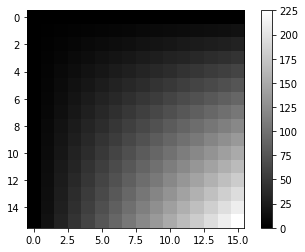

In [9]:
A=[[i * j for j in range(c)] for i in range(l)]
#La liste A contient toutes les valeurs possibles que puisse prendre la couleur grise
#pour obtenir toutes les combinaisons, nous avons inséré dans la liste le résultat de multiplciation de chaque valeur de [0-16]
#avec des valeurs de [0-16] pour obtenir à la fin une liste 2D contenant des valeur de [0-225] dont 0 représente la couleur noir,
#255 represente la couleur blanche, et toutes les autres valeurs représentent les autres niveaux de gris
print("Niveaux de gris (multiplication)",A)
print("long = ", len(A))
#pour pouvoir visualiser les résultats on utilise la fonction imshow() de matplotlib
#et pour pouvoir ajoutee une barre de couleurs aux résultatson utilise la fonction colorbar() et on termine par afficher le tracé.
plt.imshow(A,cmap='gray')
plt.colorbar()
plt.show()

Comme l'indique le tracé nous avons obtenu en une seule figure contennat chaque niveau de gris, en partant d'une liste 2D.

### Exercice 2

Niveaux de Gris (addition) [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11

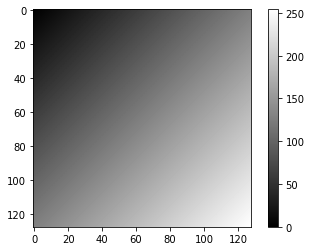

In [10]:
#Pour obtenir les niveaux de gris nous avons utilisé la multiplication pour la méthode précédante
#Pour obtenir de meilleurs résultats, cette méthode utilise l'addition dans un intervalle [0-128] pour obtenir une liste 2D
#dont les valeurs aillent de 0 à 255
B=[[x + y for y in range(q)] for x in range(p)]
print("Niveaux de Gris (addition)", B)
print("long",len(B))
#on utilise les mêmes étapes pour visualiser les résultats
plt.imshow(B,cmap='gray')
plt.colorbar()
plt.show()

### Exercice 3

Le but ici étant de se concentrer au slicing, nous avons d'abord commencé par créer une matrice aux dimensions demandées, ensuite nous avons au fur et à mesure et à l'aide du slicing- représenté les 3 cannaux de couleurs.

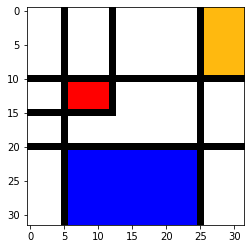

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#############################Initialisation#############################
n,m=32,32
###################################Grille###############################
A = 255*np.ones((n,m,3), dtype=np.uint8)
###################################Ligne################################
############# La couleur noire dans les lignes allant de 10 à la fin de A
A[10, :]= 0
############# La couleur noire dans les lignes allant de 20 à la fin 
A[20, :]=0
############# La couleur noire dans les lignes allant du début à l'indice 5  
A[:,5]=0
#############Lignes (n,25)
A[:,25]=0
#############Lignes (15,13)
A[15,:13]=0
#############Lignes (15,12)
A[:15,12]=0
###################################Couleur##############################
A[11:15,6:12]=(255,0,0)######rouge
A[0:10,26:32]=(255,185,15)###jaune
A[21:32,6:25]=(0,0,255)######bleu
###################################Rendu################################
#Affichage des résultats à l'aide de matplotlib
plt.imshow(A, cmap='gray')
plt.show()

### Exercice 3 encore  

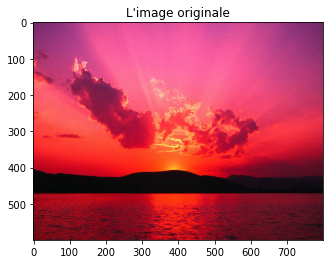

In [20]:
#img=misc.imread('Coucher.jpg')
#Pouvoir lire les images on peut uiliser la fonction imread() de imageio qui va prendre en parametres une chanine de caractere
#representant le chemin du fichier image. la fonction charge l'image et renvoi une matrice.
img=imageio.imread('Coucher.jpg')

#encore une fois, on utilise matplotlib pour visualiser les résultats
plt.imshow( img, cmap="gray")
plt.title("L'image originale")
plt.show()

#### Exercice 3.1

On ressort le plan rouge de l'image

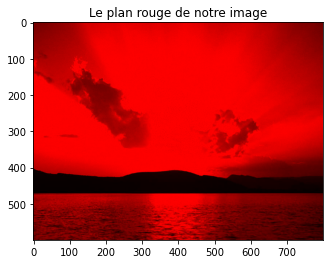

In [24]:
imgRed = np.copy(img) #notre image devient un tableau
#faisons en sorte que notre tableau devienne un tableau d'entier
dim=img.shape
for i in range(dim[0]):
    for j in range(dim[1]):
        r,v,b=imgRed[i,j]
        imgRed[i,j]=(r,0,0)
#On fait le parcours de chaque pixel de l'image, pour récupérer les valeurs r(rouge), v(vert),b(bleu)
#On garde uniquement les valeurs de r(rouge) dans imgRes, et on substitue les autres par zéro (noir)
plt.title("Le plan rouge de notre image")
plt.imshow(imgRed, cmap="gray")
plt.show()

#### Exercice 3.2

On ressort le plan vert de l'image

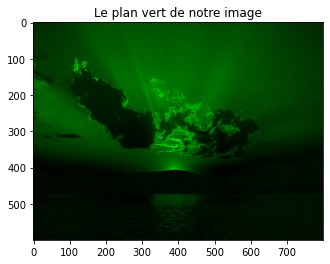

In [25]:
imgG = np.copy(img)#notre image devient un tableau
#faisons en sorte que notre tableau devienne un tableau d'entier
dim=img.shape
for i in range(dim[0]):
    for j in range(dim[1]):
        r,v,b=imgG[i,j]
        imgG[i,j]=(0,v,0)
        
#En utilisant le même concept de méthode précédante on récupére uniquement la valeur de la couleur verte, et on rempalce les
#autres par zéro (couleur noire)
#Et on affiche les résultats dans un tracé matplotlib
plt.title("Le plan vert de notre image")
plt.imshow(imgG, cmap="gray")
plt.show()

Comme prévu, et comme l'illustre la figure ci-dessus, nous avons obtenu une image contenant uniquement les niveaux de la couleur verte ou le noir.

#### Exercice 3.3

On ressort le plan bleu de l'image

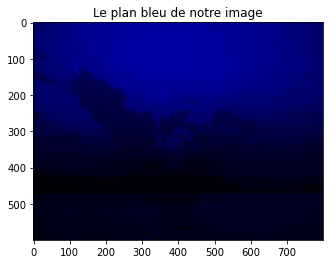

In [26]:
imgB = np.copy(img)#notre image devient un tableau
#faisons en sorte que notre tableau devienne un tableau d'entier
dim=img.shape
for i in range(dim[0]):
    for j in range(dim[1]):
        r,v,b=imgB[i,j]
        imgB[i,j]=(0,0,b)
#De la même maniere on récupere la valeur de b(bleu) et on met zéro pour les autres
plt.title("Le plan bleu de notre image")
plt.imshow(imgB, cmap="gray")
plt.show()

Remarque:
On peut remarquer que le plan bleu de notre image est moins clair que les autres, cela est peut être dû au fait que les pixels de l'image ont des valeurs de vert et de rouge plus importantes que les valeurs de bleu. 

### Exercice 4

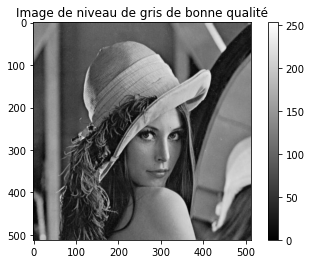

In [30]:
#il y a plusieurs bibiotheques qui peuvent nous permettre de charger une image (opencv, scipy,imageo)
#on peut même utiliser imread() de matplotlib
#pour récupérer l'image en  niveaux de gris il suffit de donner la valeur "gray" au parametre cmap dans la fonction imshow()
#de matplotlib
img_lena = plt.imread('lena1.jpg')
plt.imshow(img_lena,cmap="gray")
plt.colorbar()
plt.title("Image de niveau de gris de bonne qualité")
plt.show()

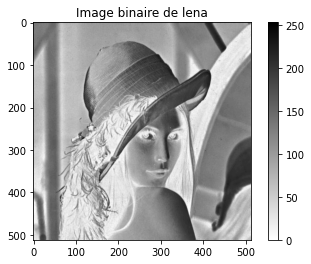

In [34]:
#Pour binariser l'image on peut utiliser la valeur "binary" pour le parametre cmap(colormaps)
#les valeurs des pixels de l'image vont etre bornées entre 0 et 100 apres avoir utiliser cmap="binary"
plt.imshow(img_lena,cmap="binary")
plt.colorbar()
plt.title("Image binaire de lena")
plt.show()

#### application de différents color map

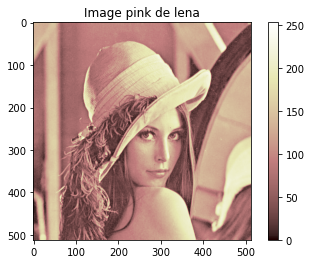

In [35]:
#Autre que les colormap "gris" et "binary" il exite d'autres qui peuvent etre appliqué à l'image, comme le colormap "pink" 
#L'utilisation du colormap "pink" ne se differe pas des utilisations des autres (gris, binary), dont il suffit de donner la valeur
#du colormap au paramtre cmap de la fonction imshow
plt.imshow(img_lena,cmap="pink")
plt.colorbar()
plt.title("Image pink de lena")
plt.show()

La figure ci-dessous illustres le résultats de l'application du colormap "pink" à l'image.
Il existe d'autre colormap, ci-dessous nous allons tester les colormap "summer", "autumn", "winter", "cool", "bone", "hot", "Wistia", "afmhot", "gist_heat", et "cooper".

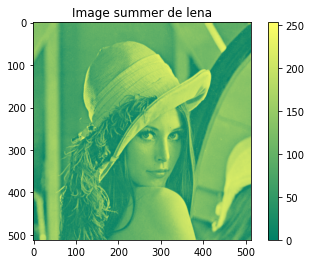

In [36]:
plt.imshow(img_lena,cmap="summer")
plt.colorbar()
plt.title("Image summer de lena")
plt.show()

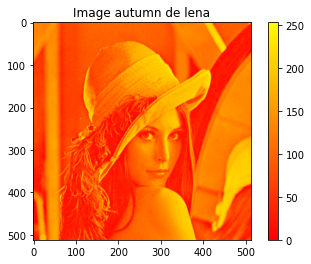

In [37]:
plt.imshow(img_lena,cmap="autumn")
plt.colorbar()
plt.title("Image autumn de lena")
plt.show()

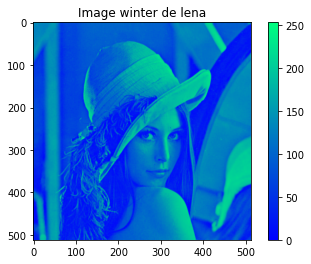

In [38]:
plt.imshow(img_lena,cmap="winter")
plt.colorbar()
plt.title("Image winter de lena")
plt.show()

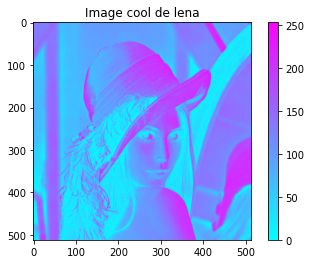

In [39]:
plt.imshow(img_lena,cmap="cool")
plt.colorbar()
plt.title("Image cool de lena")
plt.show()

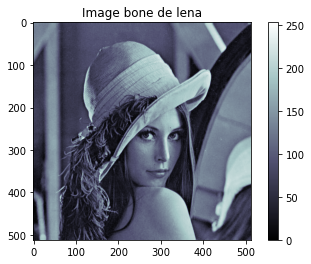

In [40]:
plt.imshow(img_lena,cmap="bone")
plt.colorbar()
plt.title("Image bone de lena")
plt.show()

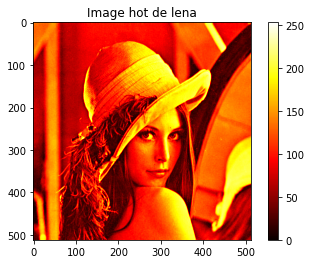

In [41]:
plt.imshow(img_lena,cmap="hot")
plt.colorbar()
plt.title("Image hot de lena")
plt.show()

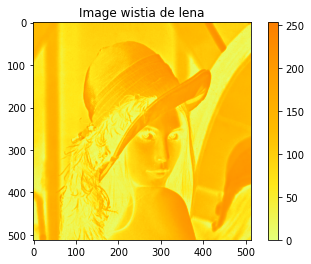

In [42]:
plt.imshow(img_lena,cmap="Wistia")
plt.colorbar()
plt.title("Image wistia de lena")
plt.show()

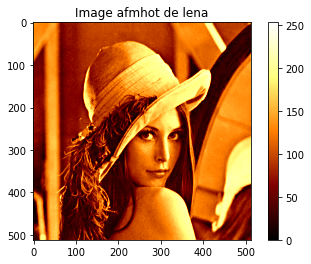

In [43]:
plt.imshow(img_lena,cmap="afmhot")
plt.colorbar()
plt.title("Image afmhot de lena")
plt.show()

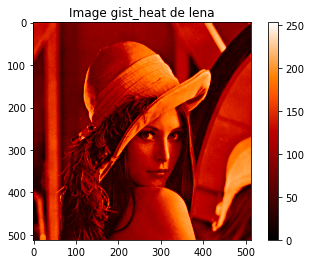

In [44]:
plt.imshow(img_lena,cmap="gist_heat")
plt.colorbar()
plt.title("Image gist_heat de lena")
plt.show()

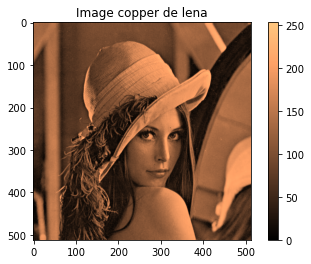

In [45]:
plt.imshow(img_lena,cmap="copper")
plt.colorbar()
plt.title("Image copper de lena")
plt.show()

### Exercice 5


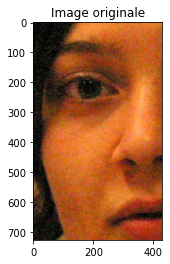

In [47]:
imgOrigine=plt.imread('photocoul.jpg')
plt.title("Image originale")
plt.imshow(imgOrigine)
plt.show()

Transformation Sépia de notre image photocoul

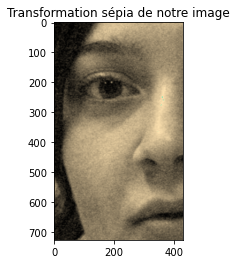

In [49]:
imgB = np.copy(imgOrigine)#notre image devient un tableau
#faisons en sorte que notre tableau devienne un tableau d'entier
dim=imgB.shape
for i in range(dim[0]):
    for j in range(dim[1]):
        r,v,b=imgB[i,j]
        Rsepia = (r * 0.393) + (v *0.769) + (b * .189)
        Gsepia = (r * .349) + (v *.686) + (b * .168)
        Bsepia = (r * .272) + (v *.534) + (b * .131)
        imgB[i,j]=(Rsepia,Gsepia,Bsepia)
#Pour pouvoir effectuer une transformation sépia à l'image, on commence par faire le parcours de chaque pixel de notre image,
#puis on substitu la valeur de r(rouge) par 0.393R + 0.769V + 0.189B (dont R,V,B sont respectivement les valeurs rouge, vert,
#et bleu du meme pixel). ainsi on substitue la valeur v(vert) par (0.349R + 0.686V + 0.168B) et la valeur de b(bleu) par 
#(0.272R + 0.534G + 0.131B)

#Et on termine par afficher les résultats
plt.title("Transformation sépia de notre image")
plt.imshow(imgB, cmap="gray")
plt.show()

## Partie 2 :Profil et projection

### Exercice 1 : profil

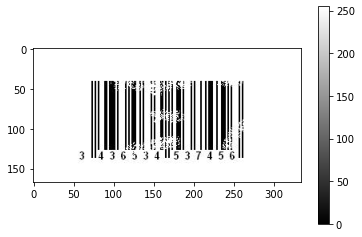

In [51]:
img = plt.imread("codebarre.bmp")
plt.imshow(img,cmap="gray")
plt.colorbar()
plt.show()

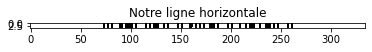

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


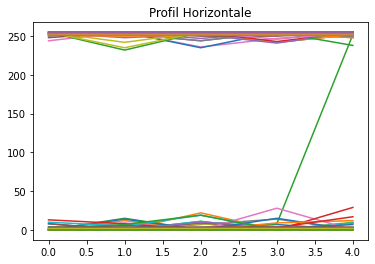

In [58]:
dim = img.shape #récupération des dimensions de l'image
#dim[1] = largueur de l'image
A = img[72:77,:dim[1]] #récupération de la ligne horizontale en recupérant une partie de l'image
#Affichage de la ligne horizontale
plt.title("Notre ligne horizontale")
plt.imshow(A,cmap="gray")
plt.show()
print(img[72:77,:dim[1]])

#Affichage du profile horizontal de l'image
#on utilise plot() de matplotlib pour dessiner le tracé représentant le profile horizontal, à partie de la ligne horizontale
plt.figure(1)
plt.title("Profil Horizontale")
plt.plot(A)
plt.show()

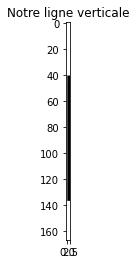

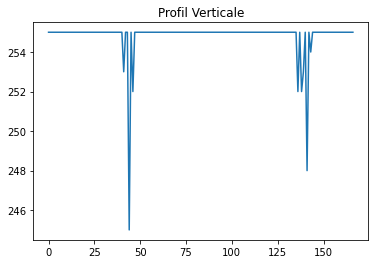

In [57]:
#A = 255*np.ones((dim[0],dim[1],3), dtype=np.uint8)
#dim[0] = longeur de l'image
A = img[72:77,:dim[1]] #récupération de la ligne verticale en recupérant une partie de l'image

#Affichage de la ligne verticale
A = img[:dim[0],72:75]
plt.title("Notre ligne verticale")
plt.imshow(A,cmap="gray")
plt.show()

#Affichage du profil vertical
plt.figure(0)
plt.title("Profil Verticale")
A = img[:dim[0],72:73]
plt.plot(A)
plt.show()

voici un profil vetical de notre: histogramme d'une ligne verticale

Comme on peut le constater d'apres les tracés, il y'a différance ignificative entre le profil horizontal et le profil vertical, 
dont on peut remarquer que dans le tracé du profil vertical, il y'a peu de changement, puisque pour la ligne vertical la couleur a changé du blanc au noir, puis du noir au blanc (2 changement=> 2impulsions dans le tracé).
Tandis que dans le profil horizontal on voit beaucoup d'impulsions puisque la ligne horizontal change beaucoup.

### Exercice 2 : projection

voici la projection horizontale de notre image : histogramme de l'ensemble des lignes horizontales de notre image.

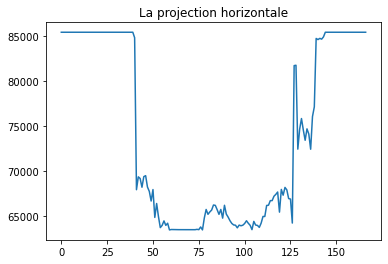

In [63]:
dim=img.shape
#dim[0] => largueur de img
#calcul de la projection horizontale
A=[np.sum(img[i:i+1,:dim[1]]) for i in range(dim[0])]      

#affichage de la projection horizontale
plt.title("La projection horizontale")
plt.plot(A)
plt.show()

voici la projection verticale de notre image : histogramme de l'ensemble des lignes verticales de notre image on constate que les pixels noirs sont au centre de l'image.

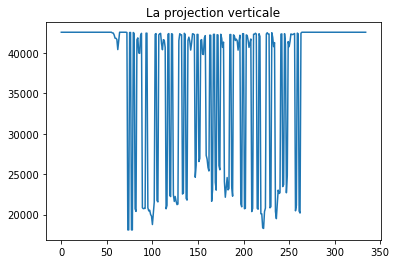

In [65]:
#pour la projection verticale on utilise le même principe de la projection horizontale, sauf qu'on utilise la longeur 
#au lieu de la largueur, et vice versa
dim=img.shape
#dim[0]==>la largueur
#dim[1]==>longeur
#Calcul
A=[np.sum(img[:dim[0],i:i+1]) for i in range(dim[1])]      


#Affichage des résultats
plt.title("La projection verticale")
plt.plot(A)
plt.show()

L'histogramme indique qu'il y'a beaucoup de contraste dans la partie A de l'image

### Exercice 3 : projection sur image

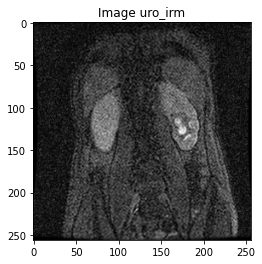

In [66]:
#chargement et affichage de l'image "uro_irm.jpg"
uro_irm=plt.imread("uro_irm.jpg")
plt.imshow(uro_irm, cmap="gray")
plt.title("Image uro_irm")
plt.show()

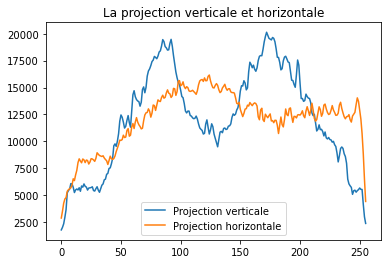

In [68]:
dim=uro_irm.shape
#dim[0]==>largeur
#dim[1]==>longeur

#calcul de projections horizontale et verticale
A=[np.sum(uro_irm[i:i+1,:dim[1]]) for i in range(dim[0])]  
B=[np.sum(uro_irm[:dim[0],i:i+1]) for i in range(dim[1])] 

#Affichage des résultats de projection
plt.title("La projection verticale et horizontale")
plt.plot(B, label="Projection verticale")
plt.plot(A, label="Projection horizontale")
plt.legend(loc="lower center") #pour distinguer entre les deux tracés
plt.show()

la projection verticale de notre image renseigne que nous commençons avec des pixels un peu plus noir, ensuite transitons par le gris puis nous touchons un peu au blanc, avant de replonger un peu vers le noir et inversement.

 la projection horizontale par contre elle nous renseigne que notre image commence par le noir,  puis transite un peu par le gris mais ne va pas trop vers le blanc puis adopte un comportement peu à peu constant avant de chute avec une transition vers le noir.

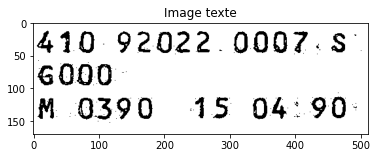

In [69]:
#Chargement et affichage de l'image text.bmp
texte=plt.imread("texte.bmp")
plt.imshow(texte, cmap="gray")
plt.title("Image texte")
plt.show()

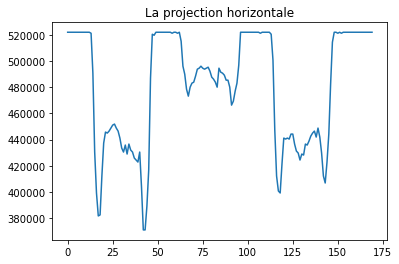

In [71]:
dim=texte.shape

#calcul de la projection horizontale
A=[np.sum(texte[i:i+1,:dim[1]]) for i in range(dim[0])]  

#Affichage des résultat
plt.title("La projection horizontale")
plt.plot(A, label="Projection horizontale")
#plt.legend(loc="lower right")
plt.show()

la projection horizontale de notre image renseigne que on a plus de blanc que de noir, car une plus grande quantité de pixel tendent vers le blanc.

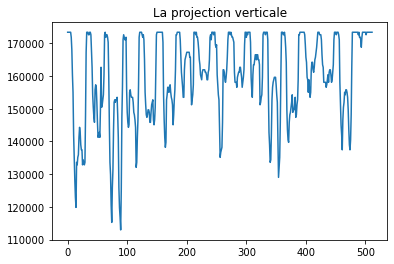

In [73]:
#Calcul de la projection verticale
B=[np.sum(texte[:dim[0],i:i+1]) for i in range(dim[1])]

#Affichage des résultats
plt.title("La projection verticale")
plt.plot(B, label="Projection verticale")
#plt.legend(loc="lower right")
plt.show()

ici aussi, la projection verticale de notre image renseigne que on a plus de blanc que de noir, car une plus grande quantité de pixel tendent vers le blanc

Résultat : On peut constater que la projection peut servir à observer la dispersion de tous les pixels d'une image, en partant d'un reférentiel horizontale ou verticale.

## Partie 3 : Redimensionnement et rotation

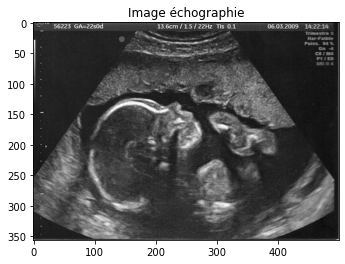

In [75]:
#Chargement et affichage de l'image "echo.jpg"
image = plt.imread("echo.jpg")
plt.imshow(image, cmap="gray")
plt.title("Image échographie")
plt.show()

Nous savons que interpoler une image c'est recalculer les valeurs des pixels après modifications de cette image, ces modifications peuvent être un zoom, une rotation,etc.

### Nearest-neighbor
pour le cas de la rotation, on s'intéresse au 4 plus proche voisin, le resultat de cette opération de part sa complexité nous renseigne que cela se fait en  0.008004903793334961 seconds.

1647437846.3607392
--- 0.0369725227355957 seconds ---


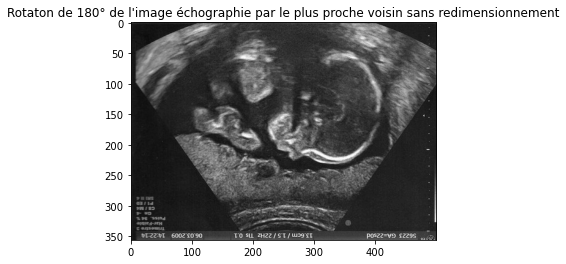

In [78]:
start = t.time()
print(start)
#pour pouvoir rotationner une image, on peut utiliser la fonction rotate(image,angle,resize,centre,ordre_interpolation
#mode,cval,clip,preserve_range) de skimage.transform
#Rotation 180° de l'image
#False dans le 3eme parametre pour rotationner sans redimensionnement
i = rotate(image,180,False,None,0,'constant',0,True,False)

## ligne de code pour réaliser la rotation avec l'interpolation choisie
print("--- %s seconds ---" % (t.time() - start))

##Affichage des résultats dans un plot
plt.imshow(i, cmap="gray")
plt.title("Rotaton de 180° de l'image échographie par le plus proche voisin sans redimensionnement")
plt.show()

#Pour mesurer le temps d'exécution du code.
# %timeit()

--- 0.028983592987060547 seconds ---


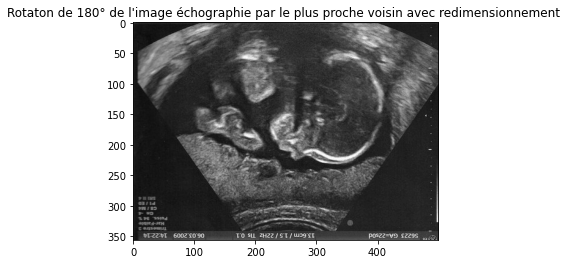

In [79]:
#pour mésurer le temps d'execution
start = t.time()
#True dans le 3eme parametre de rotate pour rotaionner avec redimensionnement 
i = rotate(image,180,True,None,0,'constant',0,True,False)

## ligne de code pour réaliser la rotation avec l'interpolation choisie
print("--- %s seconds ---" % (t.time() - start))

#Résultats
plt.imshow(i, cmap="gray")
plt.title("Rotaton de 180° de l'image échographie par le plus proche voisin avec redimensionnement ")
plt.show()
# %timeit()

La fonction rotate nous a permet de rotationner l'image dans tous les cas, pour controle le redimensionnement, on peut jouer sur les 3eme paramtre de la fonction

### Bi-linear (default)

--- 0.07795906066894531 seconds ---


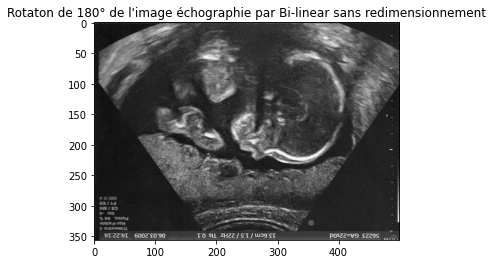

In [81]:
#start = début d'execution
start = t.time()

#le 5eme parametre de rotate indique L'ordre de l'interpolation spline, par défaut il prend la valeur 1
i = rotate(image,180,False,None,1,'constant',0,True,False)

## ligne de code pour réaliser la rotation avec l'interpolation choisie
print("--- %s seconds ---" % (t.time() - start))

#Résultats 
plt.imshow(i, cmap="gray")
plt.title("Rotaton de 180° de l'image échographie"
          +" par Bi-linear sans redimensionnement")
plt.show()
# %timeit()

--- 0.08491849899291992 seconds ---


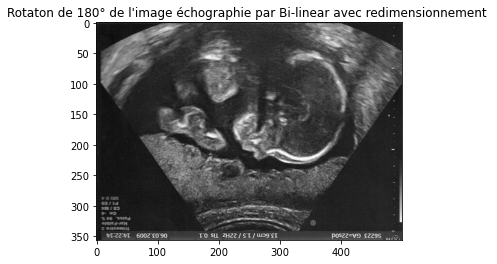

In [82]:
#Début d'éxecution
start = t.time()

##le 5eme parametre de rotate indique L'ordre de l'interpolation spline, par défaut il prend la valeur 1
##Le 3eme parametre de rotate indique si la rotation va etre faite avec ou sans redimensionnement (True=avec redimensionnement)
## ligne de code pour réaliser la rotation avec l'interpolation choisie
i = rotate(image,180,True,None,1,'constant',0,True,False)

#Temps d'exécution
print("--- %s seconds ---" % (t.time() - start))

#Affichage des résultats
plt.imshow(i, cmap="gray")
plt.title("Rotaton de 180° de l'image échographie"
          +" par Bi-linear avec redimensionnement ")
plt.show()
# %timeit()

### Bi-cubic

--- 0.11094236373901367 seconds ---


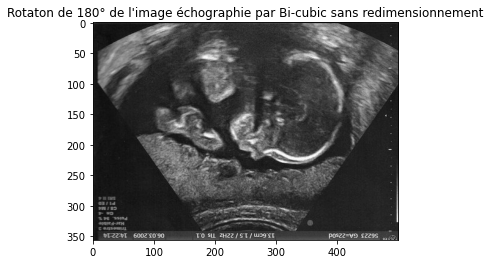

In [84]:
#start = Début de temps d'exécution
start = t.time()

##Le 5eme parametre de rotate indique L'ordre de l'interpolation spline, par défaut il prend la valeur 1
##La valeur 3 pour l'intrpolation Bi-cubic
##Le 3eme parametre de rotate indique si la rotation va etre faite avec ou sans redimensionnement (Fasle=sans redimensionnement)

## ligne de code pour réaliser la rotation avec l'interpolation choisie
i = rotate(image,180,False,None,3,'constant',0,True,False)

#calcul et affichage du temps d'execution
print("--- %s seconds ---" % (t.time() - start))

#affichage
plt.imshow(i, cmap="gray")
plt.title("Rotaton de 180° de l'image échographie par Bi-cubic sans redimensionnement")
plt.show()
# %timeit()

--- 0.12492752075195312 seconds ---


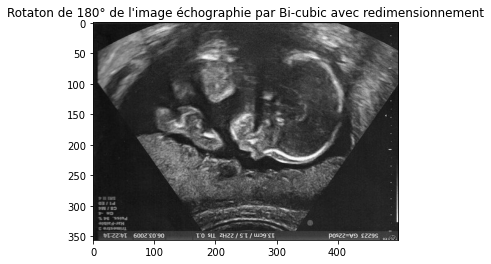

In [85]:
## Pour pouvoir effectuer une rotation Bi-cubic sans redimensionnement, on procede en suivant les meme etapes precedantes et 
## en jouant dur les parametres (3eme parametre pour redimensionnement, et le 5eme pour l'ordre d'interpolation)

start = t.time()
## ligne de code pour réaliser la rotation avec l'interpolation choisie
i = rotate(image,180,True,None,3,'constant',0,True,False)
#temps d'exécution
print("--- %s seconds ---" % (t.time() - start))

##affichage
plt.imshow(i, cmap="gray")
plt.title("Rotaton de 180° de l'image échographie par Bi-cubic avec redimensionnement")
plt.show()
# %timeit()

#### Commentez la qualité des résultats ? vous allez illustrer le fameux compromis vitesse-précision, valable en traitement d'images, comme dans d'autres domaines scientifiques, et dans la vie en général (cf la conduite d'une voiture par exemple)
le k plus proche voisin avec un délai de 0.008004903793334961 seconds permet d'obtenir la solution avant le bilinéaire qui se fait suivre du bicubic.

## Partie 4 : Histogramme

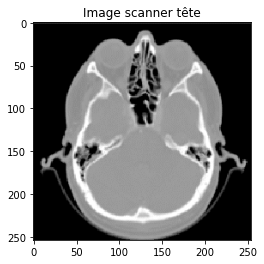

In [86]:
#chargement et affichage de l'image
im = plt.imread("scanner_tete.bmp")
plt.imshow(im, cmap="gray")
plt.title("Image scanner tête")
plt.show()

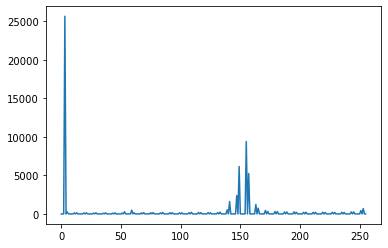

In [88]:
#Pour calculer l'histogramme, il existe plusieurs fonctions pretes à etre utilisées.
#parmi ces fonctions, il histogram() de numpy qui prend le tableau d'entrée et 
#"bins" comme deux paramètres. Les éléments successifs du tableau bin agissent comme la limite de chaque bin.
#im.ravel() renvoie un tableau aplati contigu à partir de l'image img
myhist,bins = np.histogram(im.ravel(),256,[0,255])
plt.plot(myhist)
plt.show()

On peut voir dans cette image que il y a une forte concentration de pixels noirs dans l'image, entre 140 et 165 environ, il y a une bonne dose de gris remarquable et très peu de blanc.

### Contraste

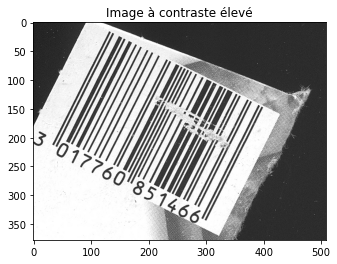

In [127]:
##Chargement et affichage de l'image
contraste_img = plt.imread("codebarre.png")
dim=contraste_img.shape
plt.title("Image à contraste élevé")
plt.imshow(contraste_img,cmap="gray")
plt.show()

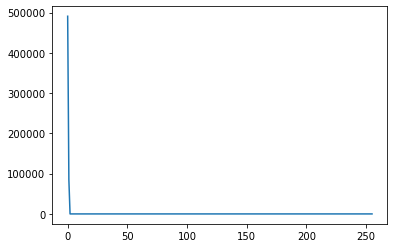

In [128]:
#Calcul d'histogramme pour l'image "codebarre.png" et son affichage dans un tracé matplotlib
myhist1,bins = np.histogram(contraste_img.ravel(),256,[0,255])
plt.plot(myhist1)
plt.show()

cette image, possède beaucoup plus de pixel concentré vers le noir, ensuite le reste tend vers le blanc


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


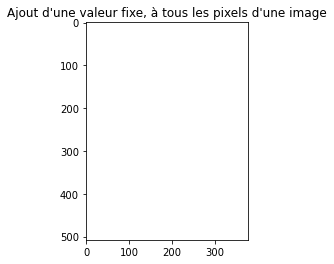

In [130]:
##Ajout d'un poid fix à l'image
#préapration de la matrice B qui va contenir les pixels de l'image + la valeur fixe qui va etre ajoutée
B = 255*np.ones((dim[0],dim[1],3), dtype=np.uint8)

##parcours de la matrice de l'image, récuperation des valeurs, ajout de la valeur fixe (30),
#stockage dans la matrice B (nouvelle image)
B=[[(contraste_img[i,j]+30) for i in range(dim[0])] for j in range(dim[1])]

#Affichage des résultats
plt.title("Ajout d'une valeur fixe, à tous les pixels d'une image")
plt.imshow(B)
plt.show()

l'ajout d'une veleur à chaque pixel de l'image, permet à celle ci, d'avoir des couleurs tendants un peu plus vers le blanc.
puisque cette ajout de valeur (positive) rend la valeur du pixel plus proche de 225 (la couleur blanche)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


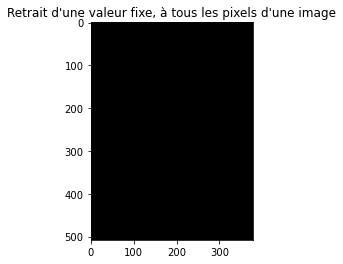

In [119]:
##soustraction d'un poid fix à l'image (ajout de poid négatif)
#préapration de la matrice B qui va contenir les pixels de l'image - la valeur fixe qui va etre ajoutée
B = 255*np.ones((dim[0],dim[1],3), dtype=np.uint8)

##parcours de la matrice de l'image, récuperation des valeurs, ajout de la valeur fixe (30),
#stockage dans la matrice B (nouvelle image)
B=[[(contraste_img[i,j]-30) for i in range(dim[0])] for j in range(dim[1])]

#Affichage des résultats
plt.title("Retrait d'une valeur fixe, à tous les pixels d'une image")
plt.imshow(B, cmap="gray")#plt.imshow(B, cmap="gray")
plt.show()

le retrait d'une valeur de 30 à chaque pixel au contraire, donne une intensité qui tend beaucoup plus vers le noir à notre image, puisque le retrait rend la valeur du pixel plus proche de 0, et 0 represente la couleur noir.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


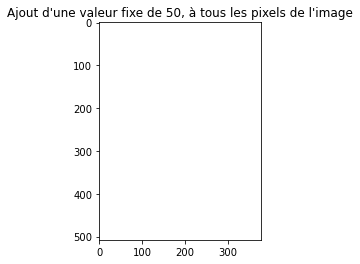

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


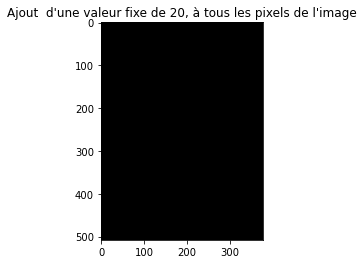

In [133]:
B = 255*np.ones((dim[0],dim[1],3), dtype=np.uint8)

#Ajout de valeur fixe
B=[[(contraste_img[i,j]+50) for i in range(dim[0])] for j in range(dim[1])]
plt.title("Ajout d'une valeur fixe de 50, à tous les pixels de l'image")
plt.imshow(B)
plt.show()
#retrait de valeur fixe
B=[[(contraste_img[i,j]-20) for i in range(dim[0])] for j in range(dim[1])]
plt.title("Ajout  d'une valeur fixe de 20, à tous les pixels de l'image")
plt.imshow(B, cmap="gray")
plt.show()

Enfin ici,on ajoute une valeur de 50 et on retire une valeur de 20, 50 étant supérieur à 30 il est évident que nous tendant beaucoup plus vers le blanc. -20 quant à lui contrairement à moins 30 possède plus de pixel aux valeurs rapprochés au blanc.
Le résultat final va donc ressembler au résultat obtenu dans l'ajout d'un poid fix de 30.

### Les images ancien et ancien2

In [134]:
ancien=plt.imread("ancien.jpg")
ancien2=plt.imread("ancien2.jpg")

#### 1. ancien

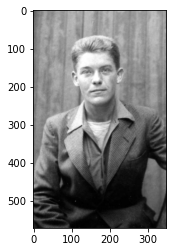

In [135]:
plt.imshow(ancien,cmap="gray")
plt.show()

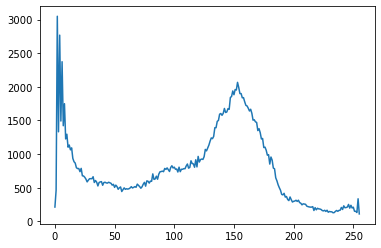

In [136]:
#Calcul et affichage de l'histogramme de l'image ancien
myhist1,bins = np.histogram(ancien.ravel(),256,[0,255])
plt.plot(myhist1)
plt.show()

l'histogramme illsutre qu'on pas vraiement de changement de couleur entre les pixel.
on beaucoup plus de pixel gris, noir suivit du blanc.

In [141]:
##dimension de l'image "ancien"
dim1=ancien.shape
##nombre de pixel = largeur*longueur
m=dim1[0]*dim1[1] 
##somme des valeurs de pixel de l'image
somme=np.sum(ancien) 
print("somme : ",somme)

##moyenne = somme/nbr_element
moy=somme/m
print("la moyenne arithmétique est : "+ str(moy))

somme :  22658657
la moyenne arithmétique est : 113.18010489510489


In [142]:
##moyenne en utilisant numpy
mean=np.mean(ancien)
print(mean)

113.18010489510489


In [143]:
##Calcul de la variance
var=0
for i in range(dim1[0]):
    for j in range(dim1[1]):
        var=((ancien[i,j]-mean)**2)+var
var=var/m
print("la variance est : "+ str(var))

la variance est : 3987.368776013663


In [144]:
#variance en utilisant numpy
var=np.var(ancien) 
print(var)

3987.368776012973


In [145]:
##écart-type
e=sqrt(var)
print("l'écart type est : "+ str(e))

##écart-type avec numpy
std=np.std(ancien) 
print(std)

l'écart type est : 63.145615651547594
63.145615651547594


#### 2. ancien2

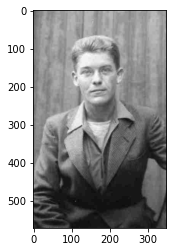

In [146]:
##Chargement et affichage de l'img
plt.imshow(ancien2,cmap="gray")
plt.show()

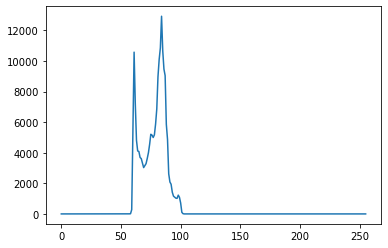

In [147]:
##Calcule et affichage de l'histogramme de l'image ancien2
myhist2,bins = np.histogram(ancien2.ravel(),256,[0,255])
plt.plot(myhist2)
plt.show()

en terme de contraste : contrairement à la précédente, celle ci est moins représentative en terme de valeur de pixel, car la dispersion des pixels nous renseignede qu'il y a une plus forte concentreation vers le noir qui tend vers le gris et très peu ailleurs.

In [148]:
#dimanesion de la matrice representant l'image
dim2=ancien2.shape
#calcul de nombre de pixel dans l'image
m=dim2[0]*dim2[1] 

#moyenne de valeur de pixel
for i in range(dim2[0]):
    moy2=np.sum(ancien2)
moy2=moy2/m
print("la moyenne arithmétique est : "+ str(moy2))

la moyenne arithmétique est : 77.74641358641358


tout comme l'indique l'histogramme,La moyenne indique que les pixels de cette image tendent vers la couleur noire, plus que ceux de l'image ancien. puisque la moyenne de de valeurs pixels de cette image est tres inférieure à celle de l'image "ancien" (moyenne =113).

In [149]:
#moyenne en utilisant numpy
mean=np.mean(ancien2)
print(mean)

77.74641358641358


In [150]:
##Calcul de la variance
var2=0
for i in range(dim2[0]):
    for j in range(dim2[1]):
        var2=((ancien2[i,j]-mean)**2)+var2
var2=var2/m
print("la variance est : "+ str(var2))

##Calcul de la variance avec numpy
var2=np.var(ancien2)
print(var2)

la variance est : 98.58033928547975
98.58033928548973


In [151]:
##écart-type
e=sqrt(var2)
print("l'écart type est : "+ str(e))

##écart-type avec numpy
std=np.std(ancien2) 
print(std)

l'écart type est : 9.928763230407387
9.928763230407387


##### Calcule du paramètre (C) caractérisant le contraste et entropie 

##### Calcul de l'entropie : $$ H(I)=-\sum_{k=1}^{n} \rho_{i}\log_{2}\rho_{i} $$

avec 
* n :le nombre de Ndg différents
* P(i) : la probabilité de chaque Ndg

on sait que L’histogramme d’une image mesure la distribution des niveaux de gris dans l’image. Pour un niveau de gris x, l’histogramme permet de connaitre la probabilité de tomber sur un pixel de valeur x en tirant un pixel au hasard dans l’image. 

In [152]:
def entropie(image):
    ##colnage de l'image originale pour eviter le fait qu'elle soit modifiée par la fonction
    img=np.copy(image)
    dimension=img.shape
    print('la dimension de l image :'+ str(dimension)+' est de : '+str(dimension[0]*dimension[1]))
    
    #nombre de pixels dans l'image
    dim_tot=dimension[0]*dimension[1] 
    #Calcul de l'histogramme de l'image
    myhist3,bins = np.histogram(img.ravel(),256,[0,255])
    #Affichage de l'histogramme de l'image
    plt.plot(myhist3)
    plt.show() 
    print(myhist3)
    print("\nla probabilité p(i)=myhist3(i)/dimensionTotal :\n")
    
    #calcul de l'entropie
    Hi=0.0
    print("\n")
    for i in range(256):
        if (myhist3[i]!=0):
            n=myhist3[i]
            proba=n/dim_tot
            print("les probabilités : "+str(proba))
            Hi=(proba*np.log2(proba))+Hi
    Hi=-Hi
    #Résultat
    print("\nl'entropie H(I)="+str(Hi))

la dimension de l image :(572, 350) est de : 200200


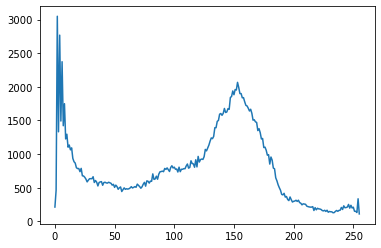

[ 213  462 3050 1332 2769 1492 2374 1422 1750 1226 1296 1103 1135 1064
 1093  937  887  867  798  785  786  739  788  678  675  656  628  587
  613  634  635  634  664  578  608  582  527  578  587  591  537  577
  582  572  569  582  574  566  539  551  506  539  518  477  500  512
  444  470  498  477  485  480  485  497  516  497  506  517  507  554
  536  517  493  514  553  580  524  602  597  569  599  596  706  624
  631  672  627  701  737  741  747  739  787  773  795  767  742  801
  827  794  806  775  779  734  806  739  775  775  784  783  824  853
  791  803  901  860  855  805  916  810  966  882  919  927  921  962
 1070 1048 1092 1134 1193 1241 1230 1263 1393 1393 1487 1501 1594 1604
 1577 1606 1679 1619 1626 1676 1666 1842 1857 1939 1883 1960 1953 2067
 1991 1900 1900 1837 1840 1778 1725 1716 1682 1641 1667 1607 1505 1511
 1480 1472 1350 1378 1319 1225 1233 1098 1104 1058  984  992  852  957
  911  792  783  648  603  544  501  463  401  394  417  361  370  326
  309 

In [153]:
#calculer l'entropie H(I) soit de l'image ancien, soit de l'image ancien2
entropie(ancien) 

Pour l'image "ancien", nous avons l'entropie H(I)=7.67884855596631

##### Calcul du paramètre C par étirement linéaire

In [158]:
def etirement_lin(image):
    #copie de l'image original pour eviter son modification
    img_copy=np.copy(image)
    #les dimension de l'image
    dimension_img = img_copy.shape
    #la valeur maximale de pixel (le plus proche du blanc)
    max=np.max(img_copy)
    #la valeur minimal de pixel (Le plus proche du noir)
    min=np.min(img_copy)
    
    print("- le max est : "+str(max))
    print("- le min est : "+str(min))
    print("On peut aussi partir de la moyenne, de l'écart-type ou des quartiles pour trouver le min et le max :")
    ##moyenne et écart type de pixel de l'image en parametres
    print("- la moyenne est : "+str(np.mean(img_copy)))
    print("- l'écart-type est : "+str(np.std(img_copy)))
    
    ##calcul et affichage de l'histogramme de l'image
    myhist3,bins = np.histogram(img_copy.ravel(),256,[0,255])
    plt.plot(myhist3)
    
    #nombre de pixels de l'image
    N = dimension_img[0]*dimension_img[1]
    
    ##Calcul du parametre C par étirement linéaire
    C=0
    C=[((myhist3/N)*255)+C for i in myhist3]
    #print("Le parametre C par étirement linéaire ", C)
    ##Afichage des résultats
    plt.plot(C)
    plt.show()

- le max est : 102
- le min est : 57
On peut aussi partir de la moyenne, de l'écart-type ou des quartiles pour trouver le min et le max :
- la moyenne est : 77.74641358641358
- l'écart-type est : 9.928763230407387


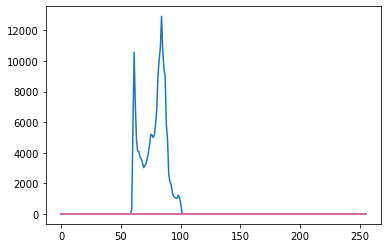

In [159]:
etirement_lin(ancien2)